In [2]:
import gymnasium as gym # you don't need this: use rld.make instead of gym.make
import numpy as np
import rldurham as rld

/Users/ameliemajor/miniforge3/envs/gymnasium/lib/python3.11/site-packages/rldurham/version_check.py:35: UserWarning: A newer version of rldurham is available (0.1.1). You have 0.1.0. Upgrade with:

    pip install --upgrade rldurham

  warnings.warn(


In [3]:
env = rld.make(
'FrozenLake-v1', # small version
# 'FrozenLake8x8-v1', # larger version
# desc=["GFFS", "FHFH", "FFFH", "HFFG"], # custom map
render_mode="rgb_array", # for rendering as image/video
is_slippery=False, # warning: slippery=True results in complex dynamics
)
rld.env_info(env, print_out=True)
rld.seed_everything(42, env)
LEFT, DOWN, RIGHT, UP = 0, 1, 2, 3

Seed set to 42


actions are discrete with 4 dimensions/#actions
observations are discrete with 16 dimensions/#observations
maximum timesteps is: 100


/Users/ameliemajor/miniforge3/envs/gymnasium/lib/python3.11/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


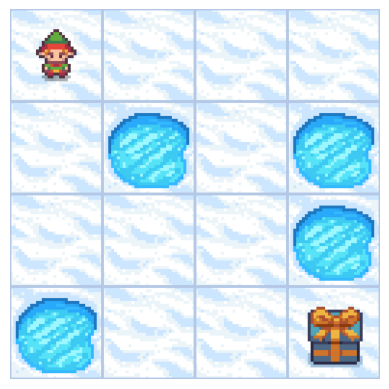

In [4]:
rld.render(env)

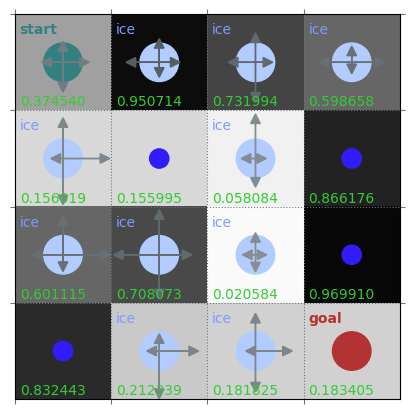

In [5]:
rld.plot_frozenlake(env=env,
v=np.random.uniform(0, 1, 16),
policy=np.random.uniform(0, 1, (16, 4)),
draw_vals=True)

### Defining a uniform policy

In reinforcement learning, defining a policy means telling the agent what action to take in each state. A uniform policy means in every state, all actions are equally likely, so the agent is doing pure exploration, with no preference.

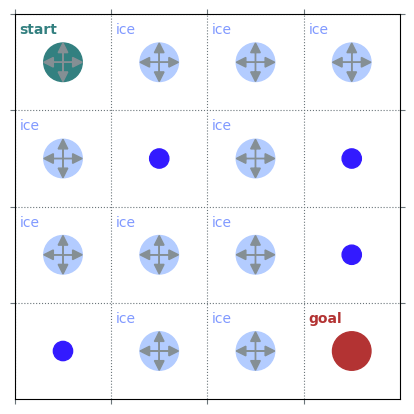

In [6]:
def uniform_policy(env):
    return np.ones((env.observation_space.n, env.action_space.n)) / env.action_space.n
rld.plot_frozenlake(env=env, policy=uniform_policy(env))

In [7]:
def policy_eval_step(env, policy, gamma, v_init=None):
    if v_init is None:
        v_init = np.zeros(env.observation_space.n)
    v = np.zeros(env.observation_space.n)
    for s_from in range(env.observation_space.n):
        for a in range(env.action_space.n):
            pi = policy[s_from, a]
            for p, s_to, r, done in env.P[s_from][a]:
                v[s_from] += pi * p * (r + gamma * v_init[s_to])
    return v

In [8]:
v = np.zeros(env.observation_space.n)

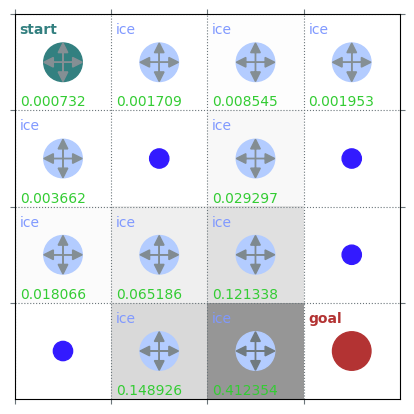

In [14]:
v = policy_eval_step(env, uniform_policy(env), 1, v)
rld.plot_frozenlake(env, v, uniform_policy(env), draw_vals=True)